# environmental nonhomothetic 7 - report
## by: Ivana Drabova   
ivana.drabova@nyu.edu

This document serves a code report for the project that involved anlysisng correlation between income elasticity of demand and environmental intensity of crops and food products. 

In [ ]:
#income incr by 1 percent you would increase by 0.8 % than your woul with wheat and rhye 

In [13]:
# lets have everyone consume beef - how much does that increase emission share ? - 20 - 25 percent - if it inceased by 

# even i nthe worst possible case - is it a provblem ? 

# its about productoin not consumption 

#coiuld look at which ocuntries are high in that 

#is this going to have some meaningfu quant effect 

#back of the envelope 

#there is a paper about this ?? 

In [2]:
import os.path
import time

# Get the modification time of the file
file_path = os.getcwd() + '/environmental_nonhomothetic_v7.ipynb'
modification_time = os.path.getmtime(file_path)

# Convert the modification time to a readable format
modification_time_string = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(modification_time))

# Print the modification time
print('Modification time:', modification_time_string)


Modification time: 2023-03-31 13:53:40


# Data

- k crop
- i is origin country (par, partner),
- j is destination country (rep, reporter),
- t is time.

## Trade data - import value added [1986-2020] 

- Level: t, i, j, k  
- Years: [1986-2020] 
- Source: FAO food trade matrix [https://www.fao.org/faostat/en/#data/TM](https://www.fao.org/faostat/en/#data/TM); FAO version: December 21, 2021
- Unit: selected only import value (unit: 1000 USD)

## GDP and GDP_pc data [1970 - 2020][1950 - 2021]

- Level: i, t
- Sources:
    - Source I: Source: FAO macro indicators [https://www.fao.org/faostat/en/#data/MK](); FAO version: May 13, 2022 
        - Unit: [millions, USD, 2015 prices] from FAO 
        - Time: [1970 - 2020] 
        
    - Source II: - [Gapminder](https://docs.google.com/spreadsheets/d/17p7CPobPSyWb5dmVyf_bmZg9Jbh4PjlRPc0G1tJjTUk/edit?usp=embed_facebook) 
        - Unit: [PPP 2017 constant international $]   
        - Year: [1950 - 2021]
- Notes: we have been using Source I

## Population data  [1970 - 2020]

- Level: i, t
- Source: population (FAO) as imputed from FAO GDP and GDP per capita data
- Notes: not being used in the model rn, nevertheless in the dataset

## Other Data
- development dummy
- OECD member dummies
- iso-codes

## Emission intensity from Ritchie (OWID) (derived from Poore and Nemecek data)
- Level: k 
- Year: 2018
- Unit: wolrd average 
- Source: [Ritchie OWID](https://ourworldindata.org/environmental-impacts-of-food) that in turn relies on Poore and Nemecek data
- Units: [CO2eq100 g protein], [Co2eq/1000 kcal]

- Notes: 
    - limitation: ignoring time dimension as well as cross-country variation, especially latter can vary a lot
    - limiation: only one year - 2018 global avg estimation
    - 32 products:Mapping to FAO trade data was done manually by constructing a correspondence table: e.g. FAO item bananas were assigned bananas EI, but also FAO item plantains were manually assigned bananas EI. Inspiration is drawn form [Halpern](https://www.nature.com/articles/s41893-022-00965-x) correspondence table.
    
## Emission intensity from FAO - not used in this analysis but it is in the big dataset
- Level: t,i,k
- Years: [1961-2020] 
- Source: https://www.fao.org/faostat/en/#data/EI 
- Units: [Co2/kg], [co2], [kg]
- Notes: 
    - original values are in tonnes 
    - not using this, nevertheless it is in the dataset
    - limations: restricted number of crops
    - advantages: over time and cross country

 # Dataset group A  
 ../data/environmental_nonhomothetic/import_val.csv
 
| column | source | used |
|------------------------------------|-------------------------------------------------| ----------------|
|0   reporter_country_code              | Trade data - import value added [1986-2020] | X |  
|1   reporter_country_code_m49         | Trade data - import value added [1986-2020] |  X |  
|2   reporter_countries                | Trade data - import value added [1986-2020] | X |   
|3   partner_country_code              | Trade data - import value added [1986-2020] | X |  
|4   partner_country_code_m49          | Trade data - import value added [1986-2020] | X |  
|5   partner_countries                 | Trade data - import value added [1986-2020] | X |  
|6   item_code                         |Trade data - import value added [1986-2020] | X |  
|7   item                              |Trade data - import value added [1986-2020] | X |  
|8   year                              |Trade data - import value added [1986-2020] | X |  
|9   import_value                      |Trade data - import value added [1986-2020] | X |  
|10  partner_emissions_co2eq           |Emission intensity from FAO  not used in this analysis but it is in the big dataset |  |  
|11  partner_emissions_intensity       |Emission intensity from FAO  not used in this analysis but it is in the big dataset |
|12  partner_production                |Emission intensity from FAO  not used in this analysis but it is in the big dataset |
|13  reporter_cntry_iso3               |Other Data | X |  
|14  partner_cntry_iso3                |Other Data | X |  
|15  reporter_dev_dummy                |Other Data |
|16  partner_dev_dummy                 |Other Data |
|17  reporter_oecd_dummy               |Other Data |
|18  partner_oecd_dummy                |Other Data |
|19  reporter_gdp_ppp_gapmin           |GDP and GDP_pc data [1970 - 2020][1950 - 2021] |
|20  reporter_gdp_pc_ppp_gapmin        |GDP and GDP_pc data [1970 - 2020][1950 - 2021] |
|21  reporter_gdp_usd_fao              |GDP and GDP_pc data [1970 - 2020][1950 - 2021] |
|22  reporter_gdp_pc_usd_fao           |GDP and GDP_pc data [1970 - 2020][1950 - 2021] | X |  
|23  reporter_pop                      |Population data [1970 - 2020] |
 
 # Dataset group B  
 ../data/ritchie/
 
| column | source | used |
|----------------------------|------------------------------------------------------------------------------| ----|                      
|ritchie_ghg_per_kcal.csv    | Emission intensity from Ritchie (OWID) (derived from Poore and Nemecek data) | X |  
|ritchie_ghg_per_protein.csv | Emission intensity from Ritchie (OWID) (derived from Poore and Nemecek data) | X |  



# Folder structure
Higlight important documents we are going to use. 

We focus here on folders: 

In [3]:
from directory_tree import display_tree
display_tree('/Users/ivana/Library/CloudStorage/Dropbox/environmental_nonhomothetic/data', header = True, max_depth=2)


$ Operating System : Darwin
$ Path : /Users/ivana/Library/CloudStorage/Dropbox/environmental_nonhomothetic/data
    
*************** Directory Tree ***************

data/
├── administrative/
│   ├── item_codes_documentation_from_emission_intensities.csv
│   └── item_codes_documentation_from_trade_matrix.csv
├── archived - fellowship data/
│   ├── climate_change_clean.csv
│   ├── emissions_climatechange_sustainab_wide.csv
│   ├── environmental_nonhomothetic_v1.csv
│   ├── ghg_emissions_clean.csv
│   ├── sustainability_clean.csv
│   ├── tco_va_agriculture.csv
│   └── tco_va_manuf.csv
├── environmental_nonhomothetic/
│   ├── df_ghg_per_kcal_true_sum.csv
│   ├── import_val.csv
│   ├── merged_pre_analysis_with_zeroes_ghg_per_kcal_nosum.csv
│   └── merged_pre_analysis_with_zeroes_ghg_per_kcal_sum.csv
└── ritchie/
    ├── corr_ritchie_fao_decr_group_kcal.csv
    ├── corr_ritchie_fao_decr_group_protein.csv
    ├── ritchie_ghg_per_kcal.csv
    └── ritchie_ghg_per_protein.csv


List of files used in this code 

In [4]:
# '../data/administrative/item_codes_documentation_from_emission_intensities.csv'
# '../data/administrative/item_codes_documentation_from_trade_matrix.csv'
# '../data/environmental_nonhomothetic/import_val.csv'
# '../data/ritchie/ritchie_ghg_per_protein.csv'
# '../data/ritchie/corr_ritchie_fao_decr_group_protein.csv'
# '../data/ritchie/ritchie_ghg_per_kcal.csv'
# '../data/ritchie/corr_ritchie_fao_decr_group_kcal.csv'

# Models



- k crop
- i is origin country (par, partner),
- j is destination country (rep, reporter),
- t is time.

## 2step method

Step 1: est $ \beta_k$

$$
\text{ln(import value}_{ijkt})=\beta_{k}\text{ln(income}_{jt})+\alpha_{ikt}+\gamma_{jt}+\varepsilon_{ijkt}
$$


Step 2 is estimate $\rho$.

$$
\rho = \text{ CORRELATION } [\beta_k  , ln(e_k)]
$$

- we estimate $ \beta_k$ with some errors and plot value with it’s 95% confidence interval
- we worry whether Step 2 correctly accounts for these errors
- we tried simple OLS (ignoring errors on $ \beta$) as well as weighting the confidence interval value - errors 

## 1step method

$$
\text{ln(import value}_{ijkt})=\underbrace{\rho\cdot e_{k}}_{=\beta_{k}+\text{error}}\cdot\text{ln(income}_{jt})+\alpha_{ikt}+\gamma_{jt}+\varepsilon_{ijkt}
$$


### question

- whether to $ln(e_k)$ or not

$$
\text{ln(import value}_{ijkt})=\underbrace{\rho\cdot ln(e_{k})}_{=\beta_{k}+\text{error}}\cdot\text{ln(income}_{jt})+\alpha_{ikt}+\gamma_{jt}+\varepsilon_{ijkt}
$$

- what to do when import value is zero (should we not log then?) 

# Imports
Import relevant libaries needed for analyses

In [5]:
import numpy as np
import pandas as pd
import time
import os
import regex as re

import plotly.express as px
import plotly.graph_objects as go

#import country_converter as coco
#cc = coco.CountryConverter()

#from functools import reduce
import nb_search as nbs

import stata_setup
stata_setup.config('/Applications/Stata/', 'mp', splash = False)
from pystata import stata
from sfi import Scalar
import sfi

import statsmodels.api as sm

from IPython.display import display, HTML
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)


#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

# Functions

## Loaders

In [6]:
## loaders 
def fix_col_names(df):
  #rename columns
  df.rename(columns={element: re.sub(r'[()]',r'', element) for element in df.columns.tolist()}, inplace=True)
  df.rename(columns={element: re.sub(r'[ ]',r'_', element) for element in df.columns.tolist()}, inplace=True)
  df.rename(columns={element: re.sub(r'[Y]',r'', element) for element in df.columns.tolist()}, inplace=True)
  df.columns= df.columns.str.lower()
  return df

def load_fao_emi_corr():
  df = pd.read_csv('../data/administrative/item_codes_documentation_from_emission_intensities.csv')
  df = df.rename(columns = {element: re.sub(r'[ ]',r'_', element.lower()) for element in df.
                                  columns.tolist()})
  return df

def load_fao_trade_corr():
    df = pd.read_csv('../data/administrative/item_codes_documentation_from_trade_matrix.csv')
    df = df.rename(columns = {element: re.sub(r'[ ]',r'_', element.lower()) for element in df.
                                    columns.tolist()})
    return df
    
def load_import_income():
  return pd.read_csv('../data/environmental_nonhomothetic/import_val.csv')

def load_ritchie_corr(key, pressure):
  if key == 'ghg_per_protein': 
    df = pd.read_csv('../data/ritchie/ritchie_ghg_per_protein.csv')
    df = df.rename(columns = {element: re.sub(r'[ ]',r'_', element.lower()) for element in df.columns.tolist()}).rename(columns = {'ghg_emissions_per_100g_protein_(poore_&_nemecek,_2018)': 'ghg_per_protein','entity' : 'crop'})
    df['crop'] = df['crop'].str.lower()
    df = df.filter(['crop', 'ghg_per_protein'])
    df = df.rename(columns = {'crop':'ritchie_code'})
    return df
  if key == 'ritchie_map_custom' and pressure == 'ghg_per_protein':
    return pd.read_csv('../data/ritchie/corr_ritchie_fao_decr_group_protein.csv')
  
  if key == 'ghg_per_kcal':
    df = pd.read_csv('../data/ritchie/ritchie_ghg_per_kcal.csv')
    df = df.rename(columns = {element: re.sub(r'[ ]',r'_', element.lower()) 
                          for element in df.columns.tolist()}).rename(columns = {'ghg_emissions_per_1000kcal_(poore_&_nemecek,_2018)': 'ghg_per_kcal','entity' : 'crop'})
    df['crop'] = df['crop'].str.lower()
    df = df.filter(['crop', 'ghg_per_kcal'])
    df = df.rename(columns = {'crop':'ritchie_code'})
    return df
  if key == 'ritchie_map_custom' and pressure == 'ghg_per_kcal':
    return pd.read_csv('../data/ritchie/corr_ritchie_fao_decr_group_kcal.csv')
  
  raise TypeError("wrong param")


In [7]:
def rename(df):
  #making names shorter 
  df = df.rename(columns = {col: re.sub('reporter', 'rep', col) for col in  df.columns})
  df = df.rename(columns = {col: re.sub('partner', 'par', col) for col in  df.columns})
  df = df.rename(columns = {col: re.sub('country', 'cntry', col) for col in  df.columns})
  df = df.rename(columns = {col: re.sub('countries', 'cntry', col) for col in  df.columns})
  return df

def reorder(df, string_list):
  li = []
  for string in string_list:
    li +=([col for col in df.columns if string in col])
  leftover = list(set(df.columns.to_list()).difference(set(li))) 
  return df[li + leftover]

def take_logs(df, col_list):
  for col in col_list:
    df['ln_'+ col] = np.log(df[col])
  return df

def take_squares(df, col_list):
  for col in col_list:
    df['sq_'+ col] = df[col]**2
  return df

# Control - Create Dataset

## notes 
- **the intersection of products between EI data and trade data**
    - only consider import value for products that we have intensity measure for them [inner merge]
    
## sum vs nosum option in parameters
- **map manually created correspondence to trade data by fao product codes**
    - e.g. notice **meat** category we created is for products CHICKEN and BEEF
    - similarly with categories like citrus fruit or grains
    - no weighting is done here, it is just **relabeling**
    
| year | from  | to  | product  FAO | product Manual category   | import value |
| ---- | ------ | --- | ------- | ---- | --- |
| 2000 | Brazil | USA | CHICKEN | meat | 100 |
| 2000 | Brazil | USA | BEEF    | meat | 50  |
    
- we have 2 options after the mapping:
    - Option 1: generate dummy categories for the product manual category as is above
        - for year,j,i pair there can be multiple entries that all correspond to the same dummy 1 (ie CHICKEN with value 150 and BEEF with 50 separately)

| year | from  | to  | product  FAO | dummy   | import value USD|
| --- | --- | --- | --- | --- | --- |
| 2000 | Brazil | USA | CHICKEN | 1 (meat) | 100 |
| 2000 | Brazil | USA | BEEF    | 1 (meat) | 50 |
- or
    - Option 2: sum the value added and then generate value-added
- for year,j,i pair there can be a **single entry** that corresponds to the same ‘banana’ category (ie BANANA and PLANTAIN show a single row with a value of 150)

| year | from  | to  |  | dummy   | import value USD |
| --- | --- | --- | --- | --- | --- |
| 2000 | Brazil | USA |  | 1 (meat) | 150 |
|  |  |  |  |  |  |

Option 2 reduces the number of observations - seems to be not much difference in the result 

In [8]:
#control

#choose parameters ###################################################################################
group_selector = 'ritchie_code' #group1, group2 ... 
pressure_type =  'ghg_per_kcal' #'ghg_per_protein'
sum_dummy = 'sum' #'sum' #nosum - see explanation above in notes of the code secion
######################################################################################################
income_df = load_import_income()
ei = load_ritchie_corr(pressure_type, pressure_type).merge(load_ritchie_corr('ritchie_map_custom', pressure_type), how = 'left', on = 'ritchie_code').filter([group_selector, pressure_type, 'fao_code', 'trade_descr'])
#merging
bigdf = income_df.merge(ei, how='inner', left_on = 'item_code', right_on = 'fao_code')

#sum import values by cateogry #######################################################################
if 'sum' == sum_dummy:
  bigdf = bigdf.groupby(by=[group_selector, 'partner_countries', 'reporter_countries', 'year']).agg({
  "reporter_country_code": "first",
  "reporter_country_code_m49": "first",
  #"reporter_countries": "first",

  "partner_country_code": "first",
  "partner_country_code_m49": "first",
  #"partner_countries": "first",

  #"year": "first",
  "import_value": "sum", #IMPORTANT 

  "reporter_cntry_iso3": "first",
  "partner_cntry_iso3": "first",

  "reporter_dev_dummy": "first",
  "partner_dev_dummy": "first",

  "reporter_oecd_dummy": "first",
  "partner_oecd_dummy": "first",
                                                                                               
  "reporter_gdp_ppp_gapmin": "first",
  "reporter_gdp_pc_ppp_gapmin": "first",
  "reporter_gdp_usd_fao": "first",
  "reporter_gdp_pc_usd_fao": "first",
  "reporter_pop": "first",
  pressure_type: "first"
  }).reset_index()
######################################################################################################


In [11]:
load_ritchie_corr('ghg_per_kcal', 'ghg_per_kcal').merge(load_ritchie_corr('ritchie_map_custom', 'ghg_per_kcal'), how = 'left', on = 'ritchie_code').filter(['group1', 'ghg_per_kcal', 'fao_code', 'trade_descr'])


,group1,ghg_per_kcal,fao_code
0,fruit,0.895833,515.0
1,fruit,1.433333,486.0
2,fruit,1.433333,489.0
3,starch,0.236000,44.0
4,meat,36.439560,870.0
...,...,...,...
69,NaN,0.407240,NaN
70,tofu,1.166052,241.0
71,veg,11.000000,388.0
72,starch,0.586843,15.0


In [7]:
#saving
#bigdf.to_csv('../data/environmental_nonhomothetic/{}_{}_{}.csv'.format('merged_pre_analysis_with_zeroes', pressure_type, sum_dummy), index = False)

In [8]:
#bigdf.describe()

In [9]:
#pd.read_csv('../data/environmental_nonhomothetic/{}_{}_{}.csv'.format('merged_pre_analysis_with_zeroes', pressure_type, sum_dummy)).describe()

# Control - pre-processing, regression, analysis

## Functions regression, model, analysis

### stata extractors

In [10]:
## stata extractors
def get_beta(var): #parameter value
  stata.run('scalar beta = _b[{}]'.format(var))
  return Scalar.getValue('beta')

def get_error(var): #confidence interval
  stata.run('scalar e_t = invttail(e(df_r),0.025)*_se[{}]'.format(var))
  return Scalar.getValue('e_t')

def get_pval(var): #confidence interval
  stata.run('scalar p_t = 2*ttail(e(df_r),abs(_b[{}]/_se[{}]))'.format(var,var))
  return Scalar.getValue('p_t')

def get_std_error(var): #std error
  stata.run('scalar std_e = _se[{}]'.format(var))
  return Scalar.getValue('std_e')

### helper funcitons

In [11]:
def rename(df):
  #making names shorter 
  df = df.rename(columns = {col: re.sub('reporter', 'rep', col) for col in  df.columns})
  df = df.rename(columns = {col: re.sub('partner', 'par', col) for col in  df.columns})
  df = df.rename(columns = {col: re.sub('country', 'cntry', col) for col in  df.columns})
  df = df.rename(columns = {col: re.sub('countries', 'cntry', col) for col in  df.columns})
  return df

def reorder(df, string_list):
  li = []
  for string in string_list:
    li +=([col for col in df.columns if string in col])
  leftover = list(set(df.columns.to_list()).difference(set(li))) 
  return df[li + leftover]

def take_logs(df, col_list):
  for col in col_list:
    df['ln_'+ col] = np.log(df[col])
  return df

def take_squares(df, col_list):
  for col in col_list:
    df['sq_'+ col] = df[col]**2
  return df

In [12]:
def stata_run_1way(df, group_selector, model): 
  ## dataframe --> stata
  stata.pdataframe_to_data(df, force=True)
  ### make int labels for groups becasue stata FE can't run on strings (i.e. varname to label is 'group_selector')
  stata.run('egen item_dummy = group({}), label'.format(group_selector))   #stata.run('tabulate item_dummy') ##stata.run('describe')
  ### get dict of labels
  label_dict = sfi.ValueLabel.getValueLabels('item_dummy')
  #fit model 
  print(model, '\n')
  stata.run('{model}'.format(model = model))
  ### get means
  means = [get_beta('c.intensity#c.ln_rep_gdp_pc_usd_fao')]
  ### get intercept
  intercept = [get_beta('_cons')]
  ### get error (Confidence interval)
  err = [get_error('c.intensity#c.ln_rep_gdp_pc_usd_fao')]
  ### get pval
  pval = [get_pval('c.intensity#c.ln_rep_gdp_pc_usd_fao')]
  ### get std e 
  std_e = [get_std_error('c.intensity#c.ln_rep_gdp_pc_usd_fao')]
  
  #print(label_dict)
  return pd.DataFrame(list(zip(means, intercept, err, pval, std_e)), columns=['EK_income', 'intercept', 'e_t', 'p_t', 'std_e'])
  
def stata_run_2way(df, group_selector, model):
  ## dataframe --> stata
  stata.pdataframe_to_data(df, force=True)
  ### make int labels for groups becasue stata FE can't run on strings (i.e. varname to label is 'group_selector')
  stata.run('egen item_dummy = group({}), label'.format(group_selector))   #stata.run('tabulate item_dummy') ##stata.run('describe')
  ### get dict of labels
  label_dict = sfi.ValueLabel.getValueLabels('item_dummy')
  #fit model and save to eststo, output is printed 
  stata.run('{model}'.format(model = model))
  ### get means# added condition to see if that varaible has been estimated 
  means = list(map(lambda n: get_beta('{}.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n)) if '{}bn.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n) in stata.get_ereturn()['e(indepvars)'].split(' ') else np.nan , label_dict.keys()))
  ### get error (Confidence interval)
  err = list(map(lambda n: get_error('{}.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n)) if '{}bn.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n) in stata.get_ereturn()['e(indepvars)'].split(' ') else np.nan , label_dict.keys()))
  ### get pval
  pval = list(map(lambda n: get_pval('{}.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n)) if '{}bn.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n) in stata.get_ereturn()['e(indepvars)'].split(' ') else np.nan , label_dict.keys()))
  ### get products
  prod = list(label_dict.values())
  ### get std error
  std_e = list(map(lambda n: get_std_error('{}.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n)) if '{}bn.item_dummy#c.ln_rep_gdp_pc_usd_fao'.format(n) in stata.get_ereturn()['e(indepvars)'].split(' ') else np.nan , label_dict.keys()))
  return pd.DataFrame(list(zip(means, prod, err, pval, std_e)), columns=['income', 'crop', 'e_t', 'p_t', 'std_e'])

def get_grouped(res_df,pressure_type): #hardcoded ritchie_code! 
  df_grouped = res_df.merge(load_ritchie_corr(pressure_type, pressure_type), left_on ='crop',right_on = 'ritchie_code', how= 'left')  
  df_grouped['ln_intensity'] = np.log(df_grouped[pressure_type])
  df_grouped = df_grouped.rename(columns={'e_t':'e_t_y', 'p_t': 'p_t_y', pressure_type: 'intensity', 'std_e': 'std_e_y'})
  return df_grouped.drop(columns=['ritchie_code', 'p_t_y'])
    

In [13]:
# regressions
def run(bdf, group_selector, pressure_type, model, one_way_flag = False, log_pressure_flag = True):
  '''incoming df has trade + crop intensities'''
  df = bdf.copy()
  #shortcut columns names
  df = rename(df) 
  #deal with flags
  if log_pressure_flag == True:
    df['ln'+pressure_type] = np.log(df[pressure_type]) # take logs
    df = df.rename(columns={'ln'+pressure_type: 'intensity'}) #intensity is ln intensit
  else:
    df = df.rename(columns={pressure_type: 'intensity'}) #intensity is NOT ln intensity
  
  #DROPPING zeroes ###
  #zero import values as Nan so that we drop them 
  df.loc[df.import_value == 0 ,'import_value'] = np.nan
  #droping zero imports and missing item categories (that we created) so that the df is shorter
  df = df.dropna(subset=[ 'import_value']).reset_index(drop=True) #item_cat'no necess if inner merge in make cat
  
  #logs and squares
  df = take_logs(df, ['import_value'] + ['rep_gdp_ppp_gapmin', 'rep_gdp_usd_fao', 'rep_gdp_pc_usd_fao'] )
  #df = take_logs(df, ['rep_gdp_ppp_gapmin', 'rep_gdp_usd_fao', 'rep_gdp_pc_usd_fao'] ) #do not log import val if there are zero values
  #df = take_squares(df, ['ln_rep_gdp_ppp_gapmin', 'ln_rep_gdp_usd_fao', 'ln_rep_gdp_pc_usd_fao'] ) #no long on import val 
  
  #reordering
  df = reorder(df,['rep_cntry','par_cntry','year','item', 'group', 'ritchie', 'gdp', 'pop', 'dummy','import', 'emissions', 'production'])

  # Stata regression estimates
  if one_way_flag == True:
    return stata_run_1way(df, group_selector, model) 
  return stata_run_2way(df, group_selector, model) #note -  this is different funciton than above line (ie stat one way vs stata functions)

## 1step method

With log on e

$$
\text{ln(import value}_{ijkt})=\underbrace{\rho\cdot ln(e_{k})}_{=\beta_{k}+\text{error}}\cdot\text{ln(income}_{jt})+\alpha_{ikt}+\gamma_{jt}+\varepsilon_{ijkt}
$$


In [14]:
#log, cluster partner contry
model = 'xi: reghdfe ln_import_value c.intensity#c.ln_rep_gdp_pc_usd_fao, absorb(par_cntry_code_m49#year#item_dummy rep_cntry_code_m49#year) cluster(par_cntry_code_m49 rep_cntry_code_m49)'
EK_income_results = run(bigdf, group_selector, pressure_type, model, one_way_flag=True, log_pressure_flag= True)
EK_income_results

xi: reghdfe ln_import_value c.intensity#c.ln_rep_gdp_pc_usd_fao, absorb(par_cntry_code_m49#year#item_dummy rep_cntry_code_m49#year) cluster(par_cntry_code_m49 rep_cntry_code_m49) 

(dropped 26615 singleton observations)
(MWFE estimator converged in 11 iterations)
> lbach & Miller applied.

HDFE Linear regression                            Number of obs   =    987,468
Absorbing 2 HDFE groups                           F(   1,    170) =      61.50
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.4334
                                                  Adj R-squared   =     0.3837
Number of clusters (par_cntry_code_m49) =        211Within R-sq.  =     0.0075
Number of clusters (rep_cntry_code_m49) =        171Root MSE      =     2.3449

(Std. err. adjusted for 171 clusters in par_cntry_code_m49 rep_cntry_code_m49)
----------------------------------------------------------------------------

,EK_income,intercept,e_t,p_t,std_e
0,0.104159,4.363155,0.026218,4.655614e-13,0.013281


## 2step method

Step 1: est $ \beta_k$

$$
\text{ln(import value}_{ijkt})=\beta_{k}\text{ln(income}_{jt})+\alpha_{ikt}+\gamma_{jt}+\varepsilon_{ijkt}
$$


In [15]:
#graphing
model = 'xi: reghdfe ln_import_value c.ln_rep_gdp_pc_usd_fao#i.item_dummy, absorb(par_cntry_code_m49#year#item_dummy rep_cntry_code_m49#year) cluster(par_cntry_code_m49 rep_cntry_code_m49)'
inc_results = run(bigdf, group_selector, pressure_type, model, one_way_flag=False, log_pressure_flag= True) #note log pressure flag is not used unless the model contains 'intensity' 
inc_results

(dropped 26615 singleton observations)
(MWFE estimator converged in 11 iterations)
> lbach & Miller applied.
note: 31.item_dummy#c.ln_rep_gdp_pc_usd_fao omitted because of collinearity

HDFE Linear regression                            Number of obs   =    987,468
Absorbing 2 HDFE groups                           F(  29,    170) =      16.87
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.4433
                                                  Adj R-squared   =     0.3945
Number of clusters (par_cntry_code_m49) =        211Within R-sq.  =     0.0249
Number of clusters (rep_cntry_code_m49) =        171Root MSE      =     2.3242

(Std. err. adjusted for 171 clusters in par_cntry_code_m49 rep_cntry_code_m49)
------------------------------------------------------------------------------
             |               Robust
ln_import_~e | Coefficient  std. err.      t    P>|t|     [95% con

,income,crop,e_t,p_t,std_e
0,0.789937,apples,0.221462,4.509084e-11,0.112189
1,0.695313,bananas,0.272468,1.196167e-06,0.138027
2,0.347545,barley,0.194968,5.562030e-04,0.098767
3,1.025549,beef (beef herd),0.197151,1.500200e-19,0.099873
4,0.920059,beet sugar,0.279024,8.163888e-10,0.141349
...,...,...,...,...,...
26,0.632310,poultry meat,0.241406,6.502029e-07,0.122292
27,0.166031,rice,0.247612,1.874005e-01,0.125435
28,0.551892,root vegetables,0.215679,1.123777e-06,0.109259
29,0.827033,tomatoes,0.311867,4.823226e-07,0.157986


In [16]:
#from 1step method 
graph_beta1 = EK_income_results['EK_income'][0]
graph_inter1 = EK_income_results['intercept'][0]
graph_e1 = EK_income_results['e_t'][0]
graph_p_t1 = EK_income_results['p_t'][0]
graph_std_e1 = EK_income_results['std_e'][0]

#from 2step method 
df_grouped = get_grouped(inc_results, pressure_type)

#for graphing a line
graph_inter2 = intercept = df_grouped['income'].mean()
slope =  graph_beta1
for x in ['ln_intensity']: #can add 'intensity' to the for loop if needed
  df_grouped['y_line_'+ x] = slope * df_grouped[x] + intercept
  df_grouped['y_line_upper_' +x] = (slope+graph_e1) * df_grouped[x] + intercept
  df_grouped['y_line_lower_'+ x] = (slope-graph_e1) * df_grouped[x] + intercept
import itables
itables.show(df_grouped)
init_notebook_mode(all_interactive=False)


<IPython.core.display.Javascript object>

Step 2 is estimate $\rho$.

$$
\rho = \text{ CORRELATION } [\beta_k  , ln(e_k)]
$$

In [21]:
df = df_grouped.dropna(subset=[ 'income']) 
df = df.loc[df['crop'] != 'wheat & rye']
df = df.drop(columns=df.columns[df.columns.str.contains('y_line')])
Y = df['income']
X = df['ln_intensity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results_ols = model.fit()


wls_model = sm.WLS(Y,X, weights=list(1/df['std_e_y']))
results_ols_w = wls_model.fit()


In [49]:
print(results_ols.summary())
results_ols.bse['ln_intensity']
results_ols.conf_int().loc['ln_intensity'].diff()[1]/2

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     9.775
Date:                Thu, 30 Mar 2023   Prob (F-statistic):            0.00420
Time:                        22:08:15   Log-Likelihood:                0.24690
No. Observations:                  29   AIC:                             3.506
Df Residuals:                      27   BIC:                             6.241
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6253      0.049     12.745   

0.06340644928399686

In [23]:
print(results_ols_w.summary())

                            WLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.309
Model:                            WLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.05
Date:                Thu, 30 Mar 2023   Prob (F-statistic):            0.00176
Time:                        21:56:46   Log-Likelihood:                 1.0187
No. Observations:                  29   AIC:                             1.963
Df Residuals:                      27   BIC:                             4.697
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6201      0.047     13.130   

In [64]:
#graphing 
def graph(df_grouped, x_var, y_var, group_selector, pressure_type , graph_beta, graph_inter, graph_p_t, graph_e, slope_ci, results_ols, results_ols_w, df = df):
  title_append = '1 step method: slope:{slope}, intercept:{inter}, pval:{pval}, std_error: {error}, slope 95% CI: {slope_ci}'.format(slope=round(graph_beta,3), inter=round(graph_inter,3),
                                                                                     pval=round(graph_p_t,3), error = round(graph_e, 3), slope_ci = round(slope_ci, 3))
  title_append2 = '2 step method: slope:{slope}, intercept:{inter}, pval:{pval}, std_error: {error}, slope 95% CI: {slope_ci}'.format(slope=round(results_ols.params['ln_intensity'],3), inter=round(results_ols.params['const'],3),
                                                                                     pval=round(results_ols.pvalues['ln_intensity'],3), error = round(results_ols.bse['ln_intensity'], 3), slope_ci = round(results_ols.conf_int().loc['ln_intensity'].diff()[1]/2, 3))
  
  upper_y = (df_grouped[y_var]+df_grouped['e_t_y']).max() + 0.2
  lower_y = (df_grouped[y_var]-df_grouped['e_t_y']).min() - 0.2

  fig1 = px.scatter(df_grouped, x=x_var, y=y_var,
                    #error_x = df_grouped['e_t'+'_x'],
                    error_y = df_grouped['e_t'+'_y'], #trendline = "lowess", 
                    text = 'crop', trendline_color_override="violet", 
                    title = pressure_type.replace('_', ' ').capitalize() + ' | ' + group_selector.capitalize() + '<br><sup>{}</sup>'.format(title_append) + '<sup>{}</sup>'.format(' intercept in 1step method not identified')+ '<br><sup>{}</sup>'.format(title_append2),
                    #range_y= [lower_y, upper_y], 
                    trendline_scope="overall",
                    labels={y_var:'Import on ln(income) + controls; level not identified', 
                            x_var: 'Cross-country LN avg ' + pressure_type.replace('_', ' '),    
                           }
                )
  
  
  fig = fig1           
  fig.update_traces(textposition='top left')
  fig.add_hrect(y0=lower_y, y1=0, line_width=0, fillcolor="red", opacity=0.1)
  fig.add_hrect(y0=0, y1=upper_y, line_width=0, fillcolor="blue", opacity=0.1)

  #fig.update_xaxes(rangeslider_visible=True)
  fig.update_layout(
      autosize=False,
      width=900*1.3,
      height=700*1.3
      )
  
  x = 'ln_intensity'
  
  fig.add_scattergl(x=df_grouped[x], y=df_grouped['y_line_'+x], mode='lines', line=dict(color='grey', dash = 'solid'), name='1 step')
  fig.add_scattergl(x=df_grouped[x], y=df_grouped['y_line_upper_'+x], mode='lines', line=dict(color='grey',dash = 'dash', width =1), name='2-step ols upper CI')
  fig.add_scattergl(x=df_grouped[x], y=df_grouped['y_line_lower_'+x], mode='lines', line=dict(color='grey',dash = 'dash', width = 1), name='2-step ols lower CI')
  fig.update_traces(line_width=1)
  fig.add_scattergl(x=df[x], y=results_ols.predict(), mode='lines', line=dict(color='purple',dash = 'dot'), name='2-step ols')
  fig.add_scattergl(x=df[x], y=results_ols_w.predict(), mode='lines', line=dict(color='green',dash = 'dashdot'), name='2-step ols weighted 1/std_error on y')
  return fig

res_graph = graph(df_grouped, 
      x_var = 'ln_intensity', y_var = 'income', 
      group_selector = group_selector, pressure_type =  pressure_type, 
      graph_beta = graph_beta1, graph_inter = graph_inter2, graph_p_t = graph_p_t1, graph_e = graph_std_e1, slope_ci = graph_e1, #1 step method rho
                  results_ols = results_ols, results_ols_w = results_ols_w, df=df ) #2 step method rho



#res_graph.show()

In [73]:
import plotly.io as pio

# Save figure to file
pio.write_image(res_graph, '../output/incomeElasticity_emissions_Ivana.png')

Analysis done with ln(import values) where zeroes were dropped, note the intercept in the 1st method in not identified and is set to equal average of the datapoints
![My Image](../output/incomeElasticity_emissions_Ivana.png)

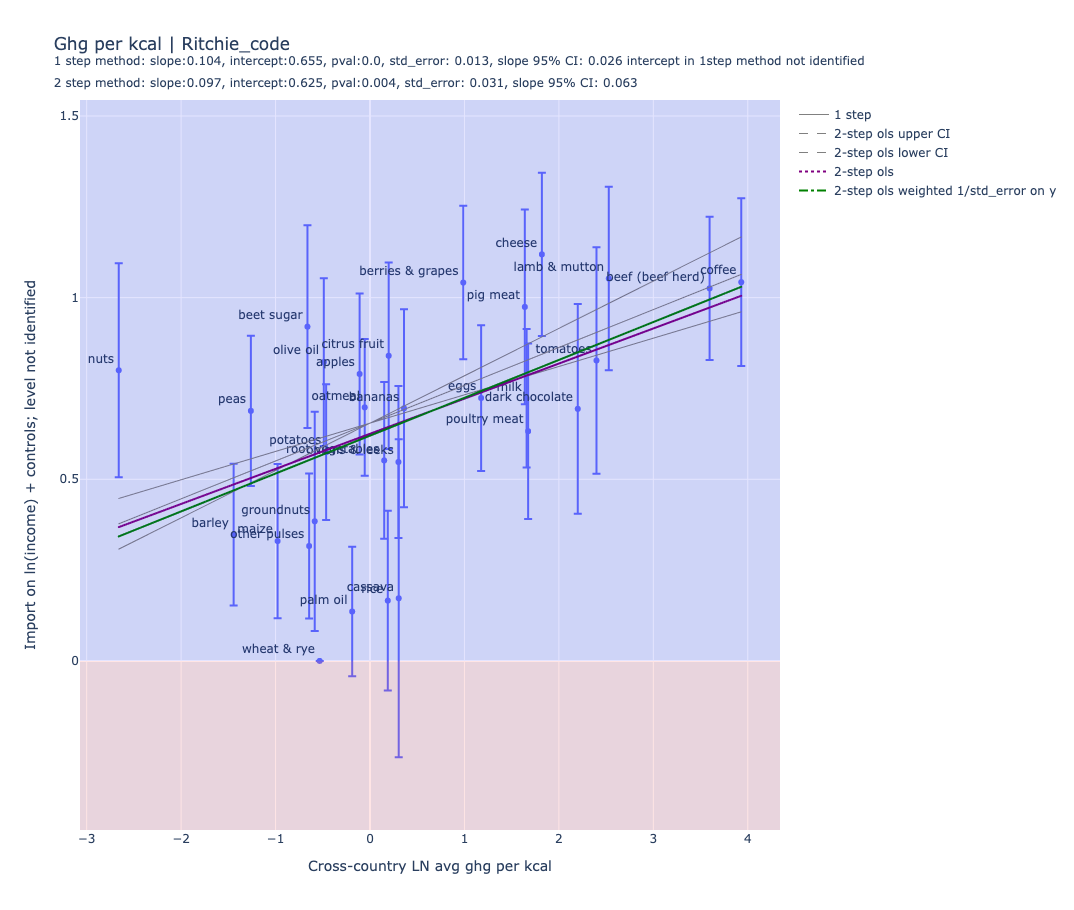

In [65]:
res_graph.show()